# Demo for the *sheaves_on_posets* SageMath package

This package can be used to calculate the cohomology modules of *finite locally free sheaves of modules over a commutative ring* on finite posets. As the category of finite posets is equivalent to the category of finite T0 topological spaces, this provides a way of calculating the sheaf cohomology for such spaces. 

In [1]:
from sheaves_on_posets import LocFreeSheaf

As an example, we consider a five-point model of the unit disk 

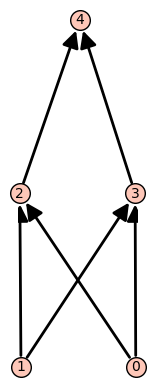

In [3]:
D = Poset({0:[2,3,4], 1:[2, 3, 4], 2:[4], 3:[4], 4:[]})
D.show()

A finite locally free sheaf of modules (over a fixed commutative ring) on a finite poset is just a functor from the poset (viewed as a category in the usual way) to the category of free modules of finite rank. So to define a sheaf on ``D`` we need to specify the rank of the stalk at every point and a matrix for every cover relation (that is, every arrow in the diagram above).

In [4]:
stalk_dict = {
    0:0,
    1:0,
    2:0,
    3:0,
    4:1
}

# instead of a matrix, we can set 0 for the zero map or 1 for the identity matrix
restriction_dict = {
    (0, 2):0,
    (0, 3):0,
    (1, 2):0,
    (1, 3):0,
    (2, 4):0,
    (3, 4):0
}

# The base ring can be specified with the key-word argument base_ring, it dedfaults to the ring of integers
F = LocFreeSheaf(stalk_dict, restriction_dict, domain_poset = D)
F


Locally Free Sheaf of Modules over Integer Ring on Finite poset containing 5 elements

We can access the stalks and restriction maps of ``F``

In [5]:
F.stalk(0)

Rank-0 free module Stalk of Locally Free Sheaf of Modules over Integer Ring on Finite poset containing 5 elements at 0 over the Integer Ring

In [6]:
F.stalk(4)

Rank-1 free module Stalk of Locally Free Sheaf of Modules over Integer Ring on Finite poset containing 5 elements at 4 over the Integer Ring

In [7]:
F.restriction(2, 4)

Generic morphism:
  From: Rank-0 free module Stalk of Locally Free Sheaf of Modules over Integer Ring on Finite poset containing 5 elements at 2 over the Integer Ring
  To:   Rank-1 free module Stalk of Locally Free Sheaf of Modules over Integer Ring on Finite poset containing 5 elements at 4 over the Integer Ring

Lets build the same sheaf in another way. We can also start with a constant rank-1 sheaf on the singleton and extend by zero. 

In [8]:
# By not specifying the domain poset, the domain poset will be build internally. 
C = LocFreeSheaf({0:1}, {})

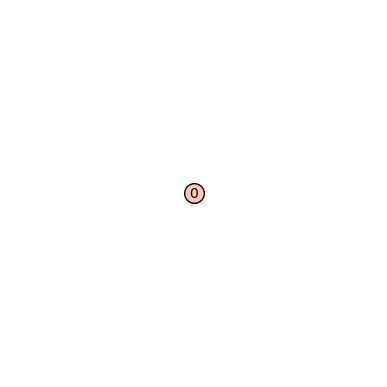

In [9]:
C.domain_poset().show()

In [10]:
inclusion_map = Hom(C.domain_poset(), D)(lambda point: {0:4}[point])
F2 = C.extend_by_zero(inclusion_map)

The sheaf cohomology can be calculated using the *Godement resolution*. The cochain complex obtained after taking global sections of this resolution can be accessed by ``godement_cochain_complex``. 

In [11]:
F.godement_cochain_complex()

Chain complex with at most 3 nonzero terms over Integer Ring

In [12]:
ascii_art(F.godement_cochain_complex())

            [-1  0  1  0]       [1]      
            [-1  0  0  1]       [1]      
            [ 0 -1  1  0]       [1]      
            [ 0 -1  0  1]       [1]      
 0 <-- C_2 <-------------- C_1 <---- C_0 <-- 0 

The sheaf cohomology of *(D, F)* is now simply the cohomology of this complex. 

In [13]:
F.cohomology()

{0: 0, 1: 0, 2: Z}

### other things
We can do some other things besides calculating sheaf cohomology

In [14]:
# Global sections of the sheaf
F.global_sections()

Rank-0 free module Global Sections of Locally Free Sheaf of Modules over Integer Ring on Finite poset containing 5 elements over the Integer Ring

In [15]:
# Sections over an upward closed subset of F (upward closed subsets correspond to open sets
#    under the equivalence between finite posets and finite T0 spaces)
F.sections([2, 3, 4])

Rank-0 free module Sections of Locally Free Sheaf of Modules over Integer Ring on Finite poset containing 5 elements on [2, 3, 4] over the Integer Ring

In [17]:
# The Euler Characteristic
F.euler_characteristic()

1

In [18]:
# The Godement sheaf
F.godement_sheaf()

Locally Free Sheaf of Modules over Integer Ring on Finite poset containing 5 elements

In [19]:
G0 = F.godement_sheaf()
G0.stalk(2)

Rank-1 free module Stalk of Locally Free Sheaf of Modules over Integer Ring on Finite poset containing 5 elements at 2 over the Integer Ring

In [21]:
# make the restriction sheaf to an upward closed subset
F.restrict_to([2, 4])

Locally Free Sheaf of Modules over Integer Ring on Finite poset containing 2 elements